In [86]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [87]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [88]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [89]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = []
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [90]:
#  3. Convert the June temperatures to a list.
temps_june = list(np.ravel(results_june))

In [91]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(results_june, columns = ['date','June Temperature'])
df_june.set_index(df_june['date'], inplace=True)

In [92]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,June Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [93]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = []
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [94]:
# 7. Convert the December temperatures to a list.
temps_dec = list(np.ravel(results_dec))

In [95]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(results_dec, columns = ['date', 'December Temperature'])
df_dec.set_index(df_dec['date'], inplace=True)

In [96]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,December Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Adittional Query 1

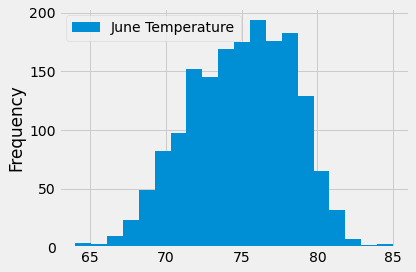

In [97]:
# Plot June Temp
df_june.plot.hist(bins=20)
plt.tight_layout()

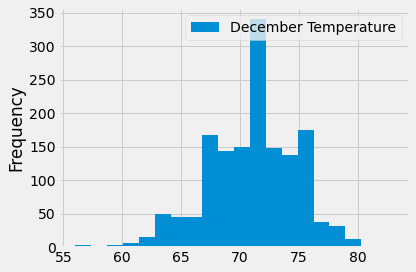

In [98]:
# Plot December Temp
df_dec.plot.hist(bins=20)
plt.tight_layout()

## Adittional Query 2

In [99]:
june_prep=session.query(Measurement.prcp).\
filter(extract('month',Measurement.date)==6).all()
june_prep_df=pd.DataFrame(june_prep,columns=['June Precipitation'])
june_prep_summary_df=june_prep_df.describe()

In [100]:
dec_prep=session.query(Measurement.prcp).\
filter(extract('month',Measurement.date)==12).all()
dec_prep_df=pd.DataFrame(dec_prep,columns=['Dec Precipitation'])
dec_prep_summary_df=dec_prep_df.describe()

In [101]:
prec_df=pd.merge(june_prep_summary_df,dec_prep_summary_df,left_index=True,right_index=True)
prec_df

,June Precipitation,Dec Precipitation
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000


In [102]:
#Luiz Fernando Hoepers